TWITTER SENTIMENT ANALYSIS

1- IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import joblib
import warnings
warnings.filterwarnings("ignore")

2- LOAD DATASETS

In [2]:
train_df = pd.read_csv('twitter_training.csv')
val_df = pd.read_csv('twitter_validation.csv')

3- ADDING COLUMN NAMES MANUALLY

In [8]:
columns = ['tweet_id', 'entity', 'sentiment', 'content']
train_df.columns = columns
val_df.columns = columns

4- VIEW DATA SAMPLES

In [9]:
print(train_df.head())
print(val_df.head())

   tweet_id       entity sentiment  \
0      2401  Borderlands  Positive   
1      2401  Borderlands  Positive   
2      2401  Borderlands  Positive   
3      2401  Borderlands  Positive   
4      2401  Borderlands  Positive   

                                             content  
0  I am coming to the borders and I will kill you...  
1  im getting on borderlands and i will kill you ...  
2  im coming on borderlands and i will murder you...  
3  im getting on borderlands 2 and i will murder ...  
4  im getting into borderlands and i can murder y...  
   tweet_id     entity sentiment  \
0       352     Amazon   Neutral   
1      8312  Microsoft  Negative   
2      4371      CS-GO  Negative   
3      4433     Google   Neutral   
4      6273       FIFA  Negative   

                                             content  
0  BBC News - Amazon boss Jeff Bezos rejects clai...  
1  @Microsoft Why do I pay for WORD when it funct...  
2  CSGO matchmaking is so full of closet hacking,...  
3  N

5- TEXT CLEANING

In [10]:
def clean_text(text):
    text = str(text)  # ensure string
    text = re.sub(r"http\S+", "", text)       # remove URLs
    text = re.sub(r"@\w+", "", text)          # remove mentions
    text = re.sub(r"#\w+", "", text)          # remove hashtags
    text = re.sub(r"[^a-zA-Z\s]", "", text)   # remove punctuation, numbers
    text = text.lower()                       # lowercase
    return text

# 🧹 5. Apply cleaning function
train_df['cleaned_content'] = train_df['content'].apply(clean_text)
val_df['cleaned_content'] = val_df['content'].apply(clean_text)


6- VISULAIZE SENTIMENT DISTRIBUTION (PIE CHART)

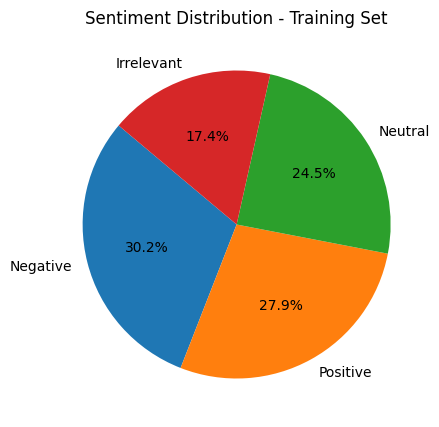

In [11]:
plt.figure(figsize=(7, 5))
train_df['sentiment'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution - Training Set')
plt.ylabel('')
plt.show()

7- VISUALIZE SENTIMENT BY ENTITY (BAR CHART)

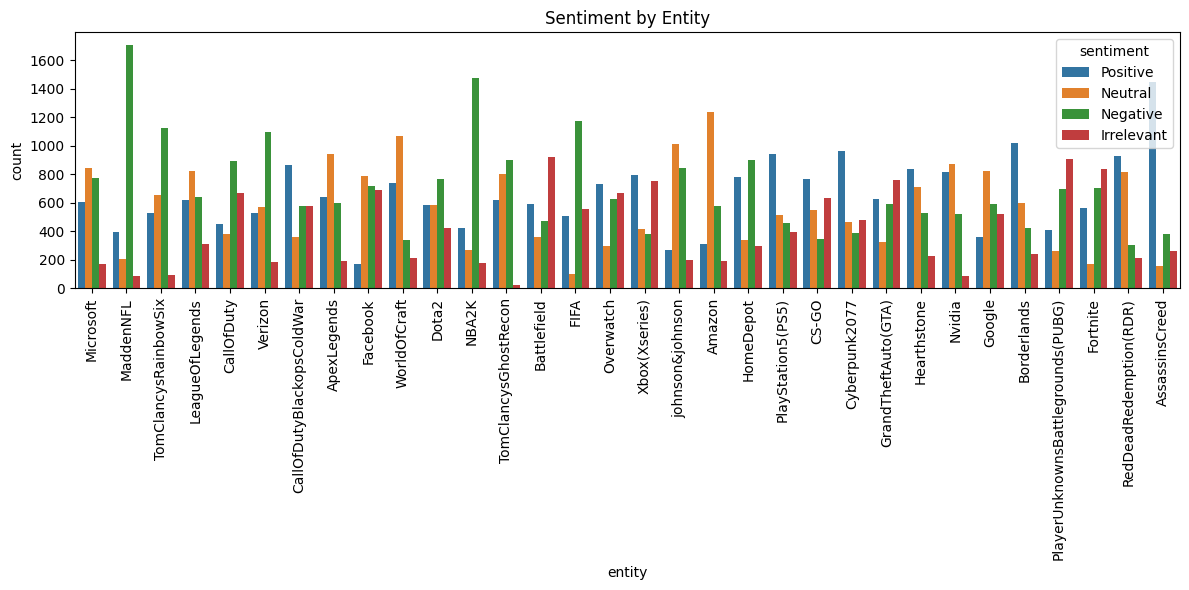

In [12]:
plt.figure(figsize=(12, 6))
sns.countplot(data=train_df, x='entity', hue='sentiment', order=train_df['entity'].value_counts().index)
plt.title('Sentiment by Entity')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


8- TEXT TO NUMERICAL FEATURES USING TF-IDF

In [13]:
tfidf = TfidfVectorizer(max_features=5000)
X_train = tfidf.fit_transform(train_df['cleaned_content'])
X_val = tfidf.transform(val_df['cleaned_content'])

9- ENCODE SENTIMENT LABELS

In [14]:
le = LabelEncoder()
y_train = le.fit_transform(train_df['sentiment'])
y_val = le.transform(val_df['sentiment'])

10- TRAIN A LOGISITC REGRESSION MODEL

In [15]:
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,200
,multi_class,'deprecated'


11- PREDICT AND EVALUATE

In [17]:
y_pred = model.predict(X_val)

print("\n📊 Classification Report:\n")
print(classification_report(y_val, y_pred, target_names=le.classes_))


📊 Classification Report:

              precision    recall  f1-score   support

  Irrelevant       0.75      0.72      0.74       171
    Negative       0.76      0.88      0.82       266
     Neutral       0.87      0.72      0.79       285
    Positive       0.82      0.87      0.84       277

    accuracy                           0.80       999
   macro avg       0.80      0.80      0.80       999
weighted avg       0.81      0.80      0.80       999



12- CONFUSION MATRIX

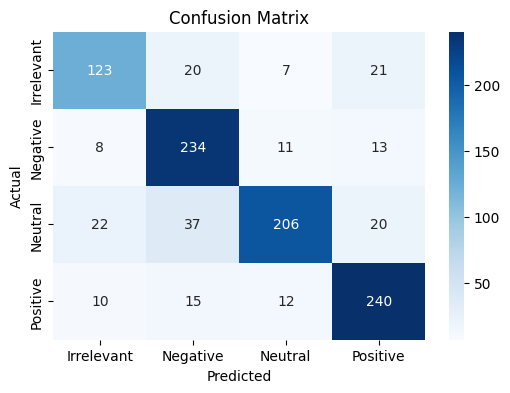

In [18]:
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


13- SAVE MODEL AND VECTORIZER

In [19]:
joblib.dump(model, 'sentiment_model.pkl')
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

14- PREDICT ON A CUSTOM TWEET

In [20]:
def predict_sentiment(tweet):
    clean = clean_text(tweet)
    vec = tfidf.transform([clean])
    pred = model.predict(vec)
    return le.inverse_transform(pred)[0]

EXAMPLE PREDICTION

In [21]:
# ✅ Example prediction
print("\n🔍 Example Prediction:")
print(predict_sentiment("I absolutely love this new update!"))


🔍 Example Prediction:
Positive
